In [44]:
import os
FFMPEG_PATH = "C:/Users/JY810251/ffmpeg-master-latest-win64-gpl-shared/bin"
os.environ["FFMPEG_BINARY"] = f"{FFMPEG_PATH}/ffmpeg.exe"
os.environ["FFPLAY_BINARY"] = f"{FFMPEG_PATH}/ffplay.exe"

from moviepy import AudioFileClip, ColorClip, TextClip, CompositeVideoClip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob
import re

In [45]:
MAIN_PATH = "C:/Users/JY810251/python/dailydictation"

In [31]:
# Get title and section from markdown
markdown_path = f"{MAIN_PATH}/markdown/DailyDictation_conversation_English.md"
with open(markdown_path) as f:
    markdown_text = f.read()

# Extract text by section using re
sections = re.split(r"##\s+\d+\.\s+[^\n]+\n", markdown_text)[1:]
titles = re.findall(r"##\s+\d+\.\s+[^\n]+", markdown_text)

# Line Break Adjustments
sections = [f"{section.strip()}\n" for section in sections]
titles = [re.sub("## ", "", title) for title in titles]

In [51]:
# Get mp3 list
AUDIO_FILE = rf"{MAIN_PATH}\mp3\*.mp3"
audio_files = sorted(glob(AUDIO_FILE), key=lambda x: int(x.split("\\")[-1].split("-")[0]))

In [32]:
max_v, index = 0, 0
for i, t in enumerate(titles):
    if max_v < len(t):
        max_v = len(t)
        index = i
print(index, max_v)
max_v, index = 0, 0
for i, t in enumerate(sections):
    if max_v < len(t):
        max_v = len(t)
        index = i
print(index, max_v)
min_v, index = 100000, 0
for i, t in enumerate(sections):
    if min_v > len(t):
        min_v = len(t)
        index = i
print(index, min_v)


77 43
89 979
24 1


In [52]:
n = 79
n = 22
n = 77 # max title
n = 89 # max sections
n = 21
print(audio_files[n])
print(titles[n])
print(f"{sections[n][:100]} ...")

C:/Users/JY810251/python/dailydictation\mp3\22-employing-a-new-member.mp3
22. Employing a new member
Well, this woman may be suitable for the job.
But is she energetic enough?
Yes, she certainly seems  ...


In [55]:
# 音声ファイル
audio = AudioFileClip(audio_files[n], buffersize=200000, nbytes=2, fps=44100)

print(f"Audio file: {audio_files[n]}")
print(f"Audio Duration: {audio.duration} seconds")

Audio file: C:/Users/JY810251/python/dailydictation\mp3\22-employing-a-new-member.mp3
Audio Duration: 28.6 seconds


In [56]:
# 背景動画
FHD = 1920, 1080
RGB = 30, 30, 30
video_duration = audio.duration + 5
color_clip = ColorClip(FHD, RGB, duration=video_duration)

print(f"Video Duration: {color_clip.duration} sec")
print(f"Size: {color_clip.size}")

Video Duration: 33.6 sec
Size: (1920, 1080)


In [37]:
# TextClip(
#     font,
#     text=None,
#     filename=None,
#     font_size=None,
#     size=(None, None),
#     margin=(None, None),
#     color="black",
#     bg_color=None,
#     stroke_color=None,
#     stroke_width=0,
#     method="label",
#     text_align="left",
#     horizontal_align="center",
#     vertical_align="center",
#     interline=4,
#     transparent=True,
#     duration=None,
# )

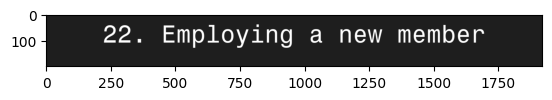

1920 200


In [59]:
# Title Clip
FONT = "../font/ARIAL.ttf"
FONT = "../font/TIMES.ttf"
FONT = "../font/MONOS.ttf"
TITLE_HIGHT = 200
MARGIN_H, MARGIN_V = 30, 30

title_clip = TextClip(
    FONT,
    text=titles[n],
    font_size=95,
    size=(FHD[0]-MARGIN_H-MARGIN_V, TITLE_HIGHT-MARGIN_H-MARGIN_V),
    margin=(MARGIN_H, MARGIN_V),
    color="white",
    bg_color=RGB,
    method="label",
    horizontal_align="center",
    vertical_align="top",
    duration=video_duration,
)

# Check
title_clip_file = f"../img/title_clip_No.{n+1}.png"
title_clip.save_frame(title_clip_file)
img = mpimg.imread(title_clip_file)
plt.imshow(img)
plt.show()  # 画像を表示
print(title_clip.w, title_clip.h)

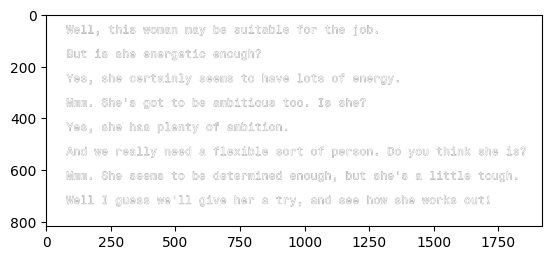

1920 818


In [ ]:
# Sectons Clip
section_clip = TextClip(
    FONT,
    sections[n],
    # font_size=80,
    color="white",
    size=(1920-80, None),
    # method="caption",
    method="label",
    margin=(50, 50, 30, 0),
    interline=50,
    duration=video_duration,
)

section_clip_file = f"../img/section_clip_No.{n+1}.png"
section_clip.save_frame(section_clip_file)
img = mpimg.imread(section_clip_file)
plt.imshow(img)
plt.show()
print(section_clip.w, section_clip.h)

In [40]:
START_POSITION = 900
SPEED_PARAMETER = 1.2
initial_speed = section_clip.h / video_duration * SPEED_PARAMETER
print(initial_speed)
section_clip = section_clip.with_position(
    lambda t: ("center", START_POSITION - t * initial_speed)
)

29.21428571428571


In [41]:
# 背景と音声を合成
background_with_audio = color_clip.with_audio(audio)

# 背景とテキストを合成
video = CompositeVideoClip([background_with_audio, section_clip, title_clip])

In [42]:
# 動画を保存
video.write_videofile(f"../mp4/test_No.{n+1}.mp4", fps=1, codec="libx264")

                                                               
chunk: 100%|██████████| 1/1 [06:44<00:00, 404.61s/it, now=None]   

MoviePy - Building video ../mp4/test_No.22.mp4.
MoviePy - Writing audio in test_No.22TEMP_MPY_wvf_snd.mp3









                                                               
                                                                  
chunk: 100%|██████████| 1/1 [06:45<00:00, 405.36s/it, now=None]   

MoviePy - Done.
MoviePy - Writing video ../mp4/test_No.22.mp4





































                                                               
                                                                  
chunk: 100%|██████████| 1/1 [06:52<00:00, 412.10s/it, now=None]   

MoviePy - Done !
MoviePy - video ready ../mp4/test_No.22.mp4
